## Practical 5 : KNN using `sklearn`

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

### Loading data

In [2]:
X, y = load_iris(return_X_y=True)

X_train, y_train = X[0:150:2, ...], y[0:150:2]
X_test, y_test = X[1:150:2, ...], y[1:150:2]

### KNN Classification Model

In [3]:
k = 3 # No. of neighbors

knn_model = KNeighborsClassifier(k, weights='uniform')

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
y_pred_knn = knn_model.predict(X_test)

In [5]:
confusion_matrix(y_test, y_pred_knn)

array([[25,  0,  0],
       [ 0, 23,  2],
       [ 0,  1, 24]])

### Behaviour of model with increasing K and uniform weights

In [6]:
K = np.arange(1, X_train.shape[0], step=2)
acc = np.empty_like(K, dtype=np.float_)

In [7]:
for (i, k) in enumerate(K):
    knn_model = KNeighborsClassifier(k, weights='uniform')
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    acc[i] = accuracy_score(y_test, y_pred_knn, normalize=True)

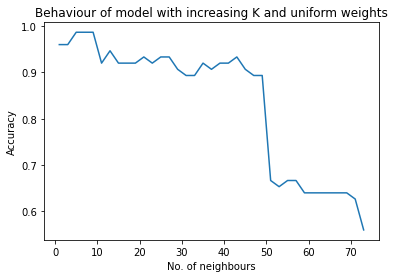

In [8]:
plt.plot(K, acc)
plt.title("Behaviour of model with increasing K and uniform weights")
plt.xlabel("No. of neighbours")
plt.ylabel("Accuracy")
plt.show()

### Behaviour of model with increasing K and non-uniform weights

In [9]:
K = np.arange(1, X_train.shape[0], step=2)
acc = np.empty_like(K, dtype=np.float_)

In [10]:
for (i, k) in enumerate(K):
    knn_model = KNeighborsClassifier(k, weights='distance')
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    acc[i] = accuracy_score(y_test, y_pred_knn, normalize=True)

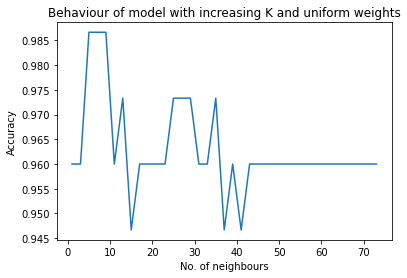

In [11]:
plt.plot(K, acc)
plt.title("Behaviour of model with increasing K and uniform weights")
plt.xlabel("No. of neighbours")
plt.ylabel("Accuracy")
plt.show()